In [36]:
%reset -f
%run -i eppi0_columns.py

import ROOT

df0 = ROOT.RDataFrame("h22","data/eppi0.inb.qa.root")

df0 = define_eppi0_columns_using_proton(df0)

#df0 = df0.Filter("tt<2").Filter("ww>2").Filter("pe>2")
df0 = df0.Filter("ww>2").Filter("pe>2")


mc = ROOT.TChain("h22")
mc.Add("data/mc.root")
#mc.Add("data/dst.hipo.root")
#mc.Add("data/eppi0_input.60k.0001.hipo.root")
df1 = ROOT.RDataFrame(mc)
df1 = define_eppi0_columns_using_proton(df1)
#df1 = df1.Filter("tt<2").Filter("ww>2").Filter("pe>2")


hmm2s = [df.Histo1D(("hmm2","",100,-0.5,0.5), "mm2") for df in [df0,df1]]
hq2s = [df.Histo1D(("hq2","",100,0,11), "q2") for df in [df0,df1]]


h1s = []
for df in [df0,df1]:
    h1s.append([])
    rrs = [(200,0,10),(200,0,50),(180,0,360),
           (200,0,2),(200,0,50),(180,0,360)]
    vvs = 'pe,the,fie,pp,thp,fip'.split(',')
    ttls = 'electron momentum,electron #theta,electron #phi'.split(',')
    ttls += 'proton momentum,proton #theta,proton #phi'.split(',')
    for rr,vv,ttl in zip(rrs,vvs,ttls):
        h1s[-1].append(df.Histo1D(("h"+vv,ttl,*rr),vv))

h2s = []
for df in [df0,df1]:
    rrs = [(150,0,6),(100,0,35),(180,0,360)]
    ttls = 'photon momentum,photon #theta,photon #phi'.split(',')
    h2s.append([])
    vvs = 'pg1,thg1,fig1'.split(',')
    for rr,vv,ttl in zip(rrs,vvs,ttls):
        h2s[-1].append(df.Histo1D(("h"+vv,ttl,*rr),vv))
    h2s.append([])
    vvs = 'pg2,thg2,fig2'.split(',')
    for rr,vv,ttl in zip(rrs,vvs,ttls):
        h2s[-1].append(df.Histo1D(("h"+vv,ttl,*rr),vv))

h3s = []
for df in [df0,df1]:
    h3s.append([])
    rrs = [(200,0,10),(200,0,1),(200,0,1),(200,1.5,4.5)]
    vvs = 'q2,xb,tt,ww'.split(',')
    ttls = 'Q^{2},x_{B},-t,W'.split(',')
    for rr,vv,ttl in zip(rrs,vvs,ttls):
        h3s[-1].append(df.Histo1D(("h"+vv,ttl,*rr),vv))


h4s = []
for df in [df0,df1]:
    h4s.append([])
    rrs = [(200,-0.5,0.5),(200,0.07,0.2)]
    vvs = 'mm2,mgg'.split(',')
    ttls = 'MM^{2}_{epX},M_{#gamma#gamma}'.split(',')
    for rr,vv,ttl in zip(rrs,vvs,ttls):
        h4s[-1].append(df.Histo1D(("h"+vv,ttl,*rr),vv))



def getStack(h0,h1):
    hs = ROOT.THStack("hs", ';'.join([h0.GetTitle(), h0.GetTitle()]))
    for hh in [h0,h1]:
        hh.Scale(1/hh.Integral())
        hs.Add(hh,"hist")
    return hs


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


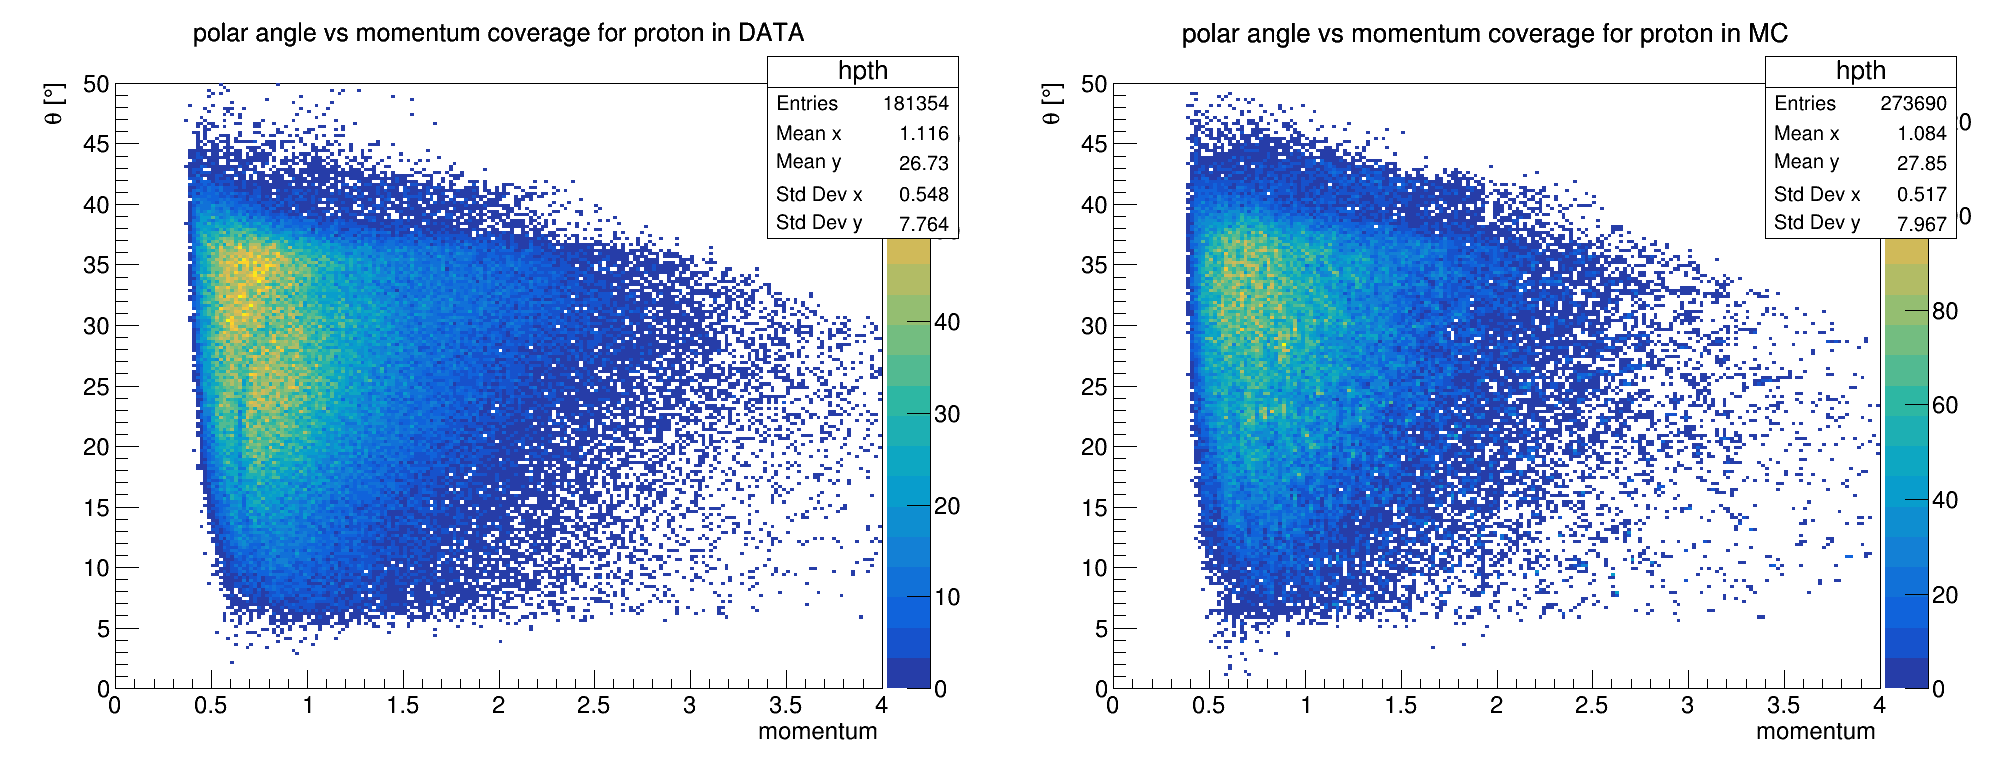

In [42]:
hpth0 = df0.Histo2D(("hpth","polar angle vs momentum coverage for proton in DATA;momentum;#theta [#circ]",200,0,4,200,0,50),"pp","thp")
hpth1 = df1.Histo2D(("hpth","polar angle vs momentum coverage for proton in MC;momentum;#theta [#circ]",200,0,4,200,0,50),"pp","thp")

c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(2,1)
c1.Draw()
c1.cd(1)
hpth0.Draw("colz")
c1.cd(2)
hpth1.Draw("colz")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file kin_compare_pg1.pdf has been created


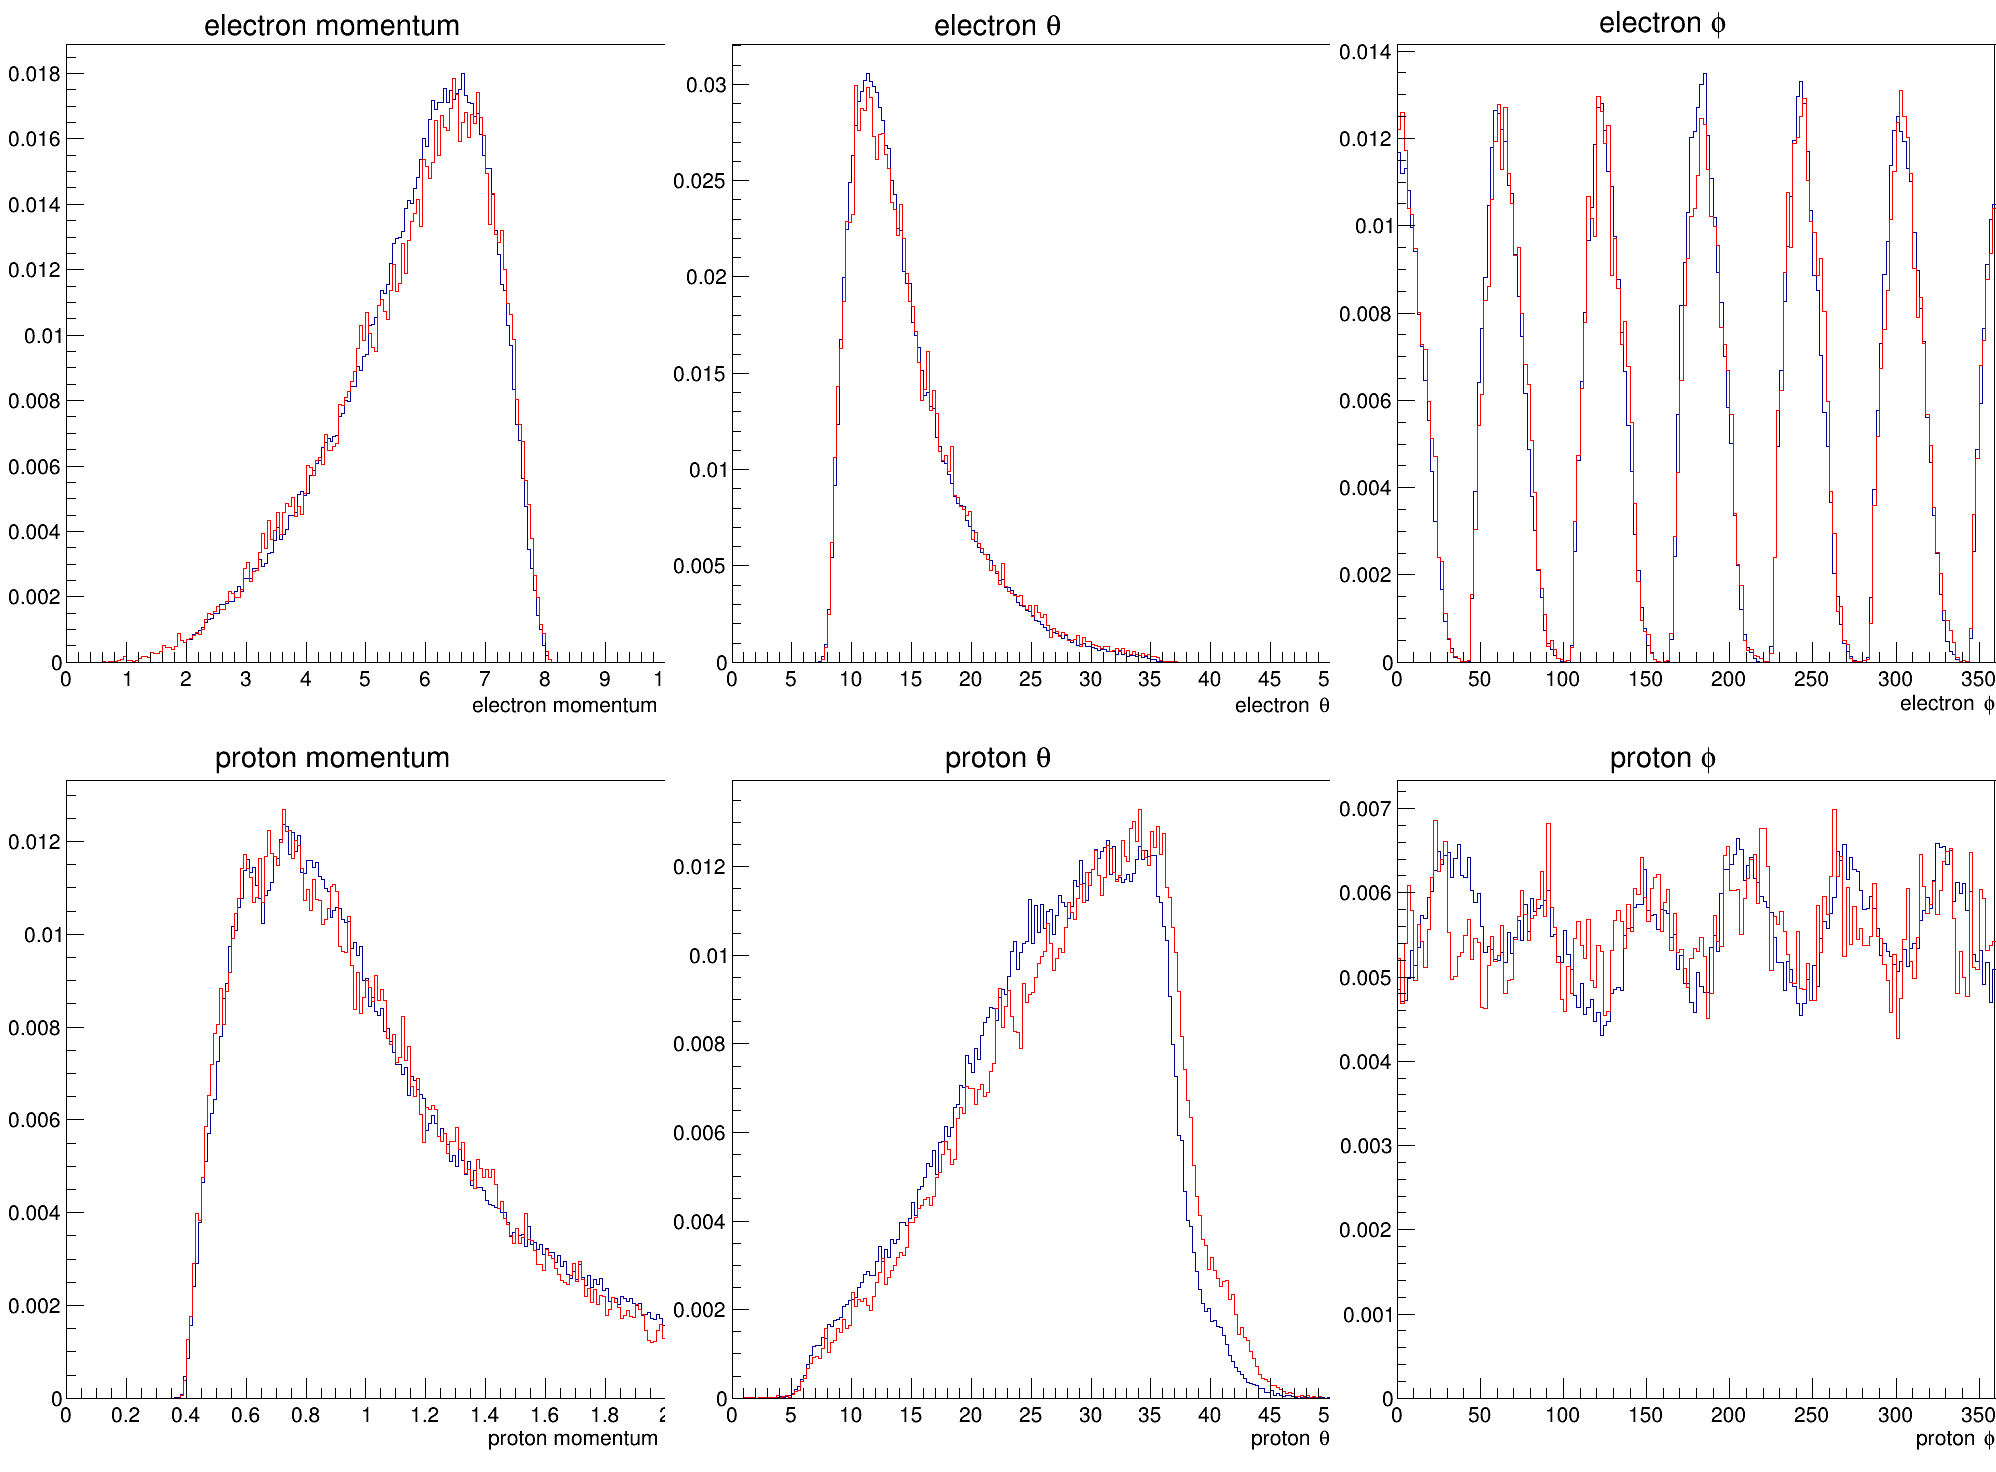

In [38]:
c1 = ROOT.TCanvas("c1","c1",2000,1500)
c1.Draw()

hss=[]
c1.Divide(3,2,0.0001,0.0001)
ipad=0
for h0,h1 in zip(*h1s):
    ipad+=1
    c1.cd(ipad).SetMargin(0.1,0,0.1,0.06)
    h1.SetLineColor(2)
    hs = getStack(h0.GetValue(),h1.GetValue())
    hs.Draw("nostack")
    hss.append(hs)

c1.Print("kin_compare_pg1.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file kin_compare_pg2.pdf has been created


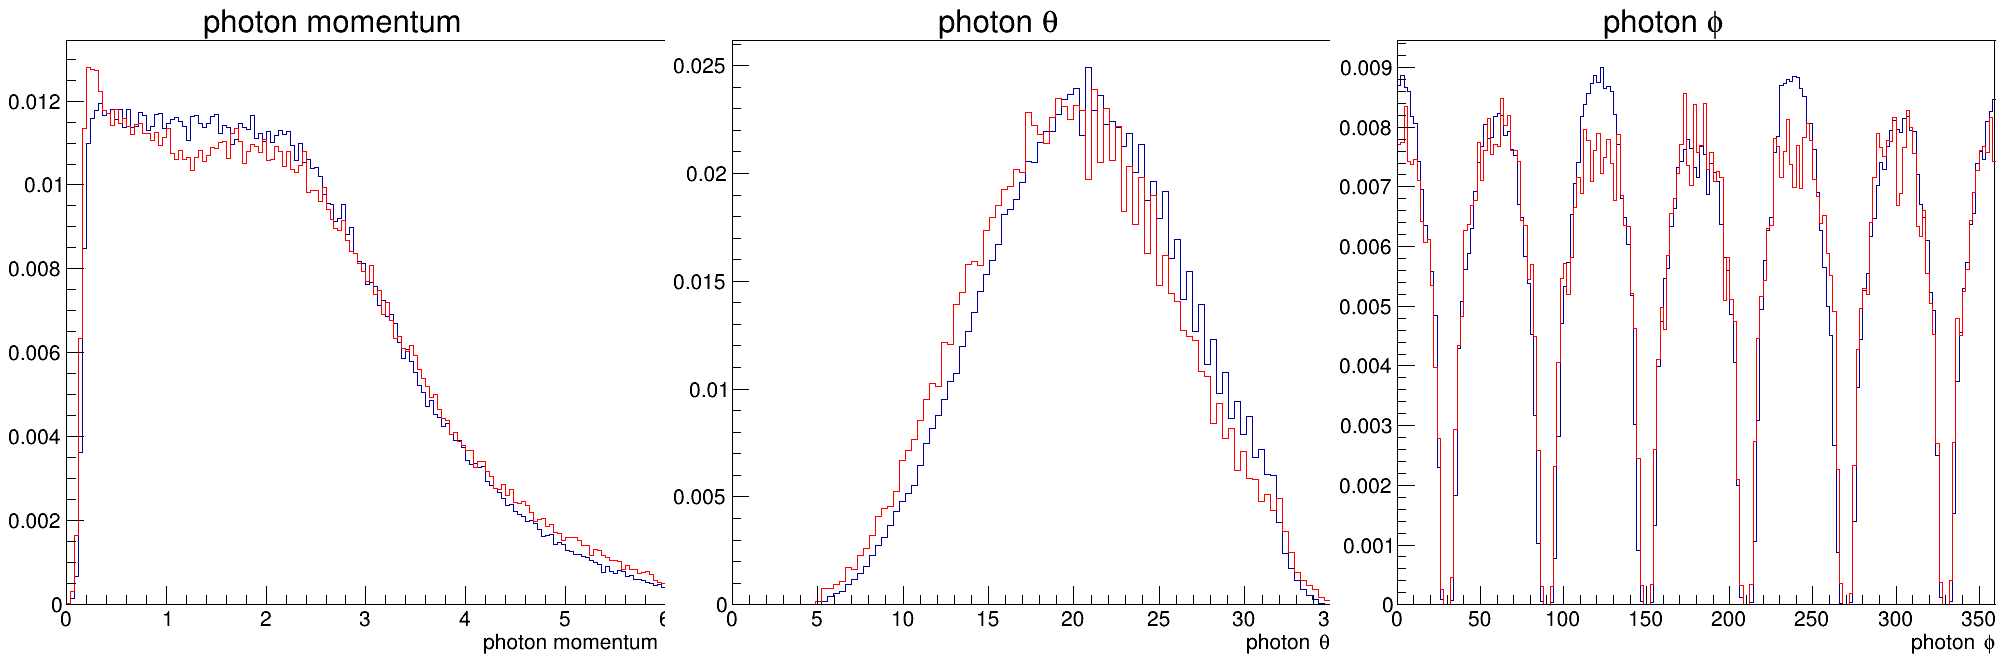

In [39]:
c1 = ROOT.TCanvas("c1","c1",2000,700)
c1.Draw()

hss=[]
c1.Divide(3,1,0.0001,0.0001)

ipad=0
for h00,h01,h10,h11 in zip(*h2s):
    ipad+=1
    c1.cd(ipad).SetMargin(0.1,0,0.1,0.06)
    hs = getStack(h00.GetValue()+h01.GetValue(),h10.GetValue()+h11.GetValue())
    hs.GetHists()[-1].SetLineColor(2)
    hs.Draw("nostack")
    hss.append(hs)
    
c1.Print("kin_compare_pg2.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file kin_compare_pg3.pdf has been created


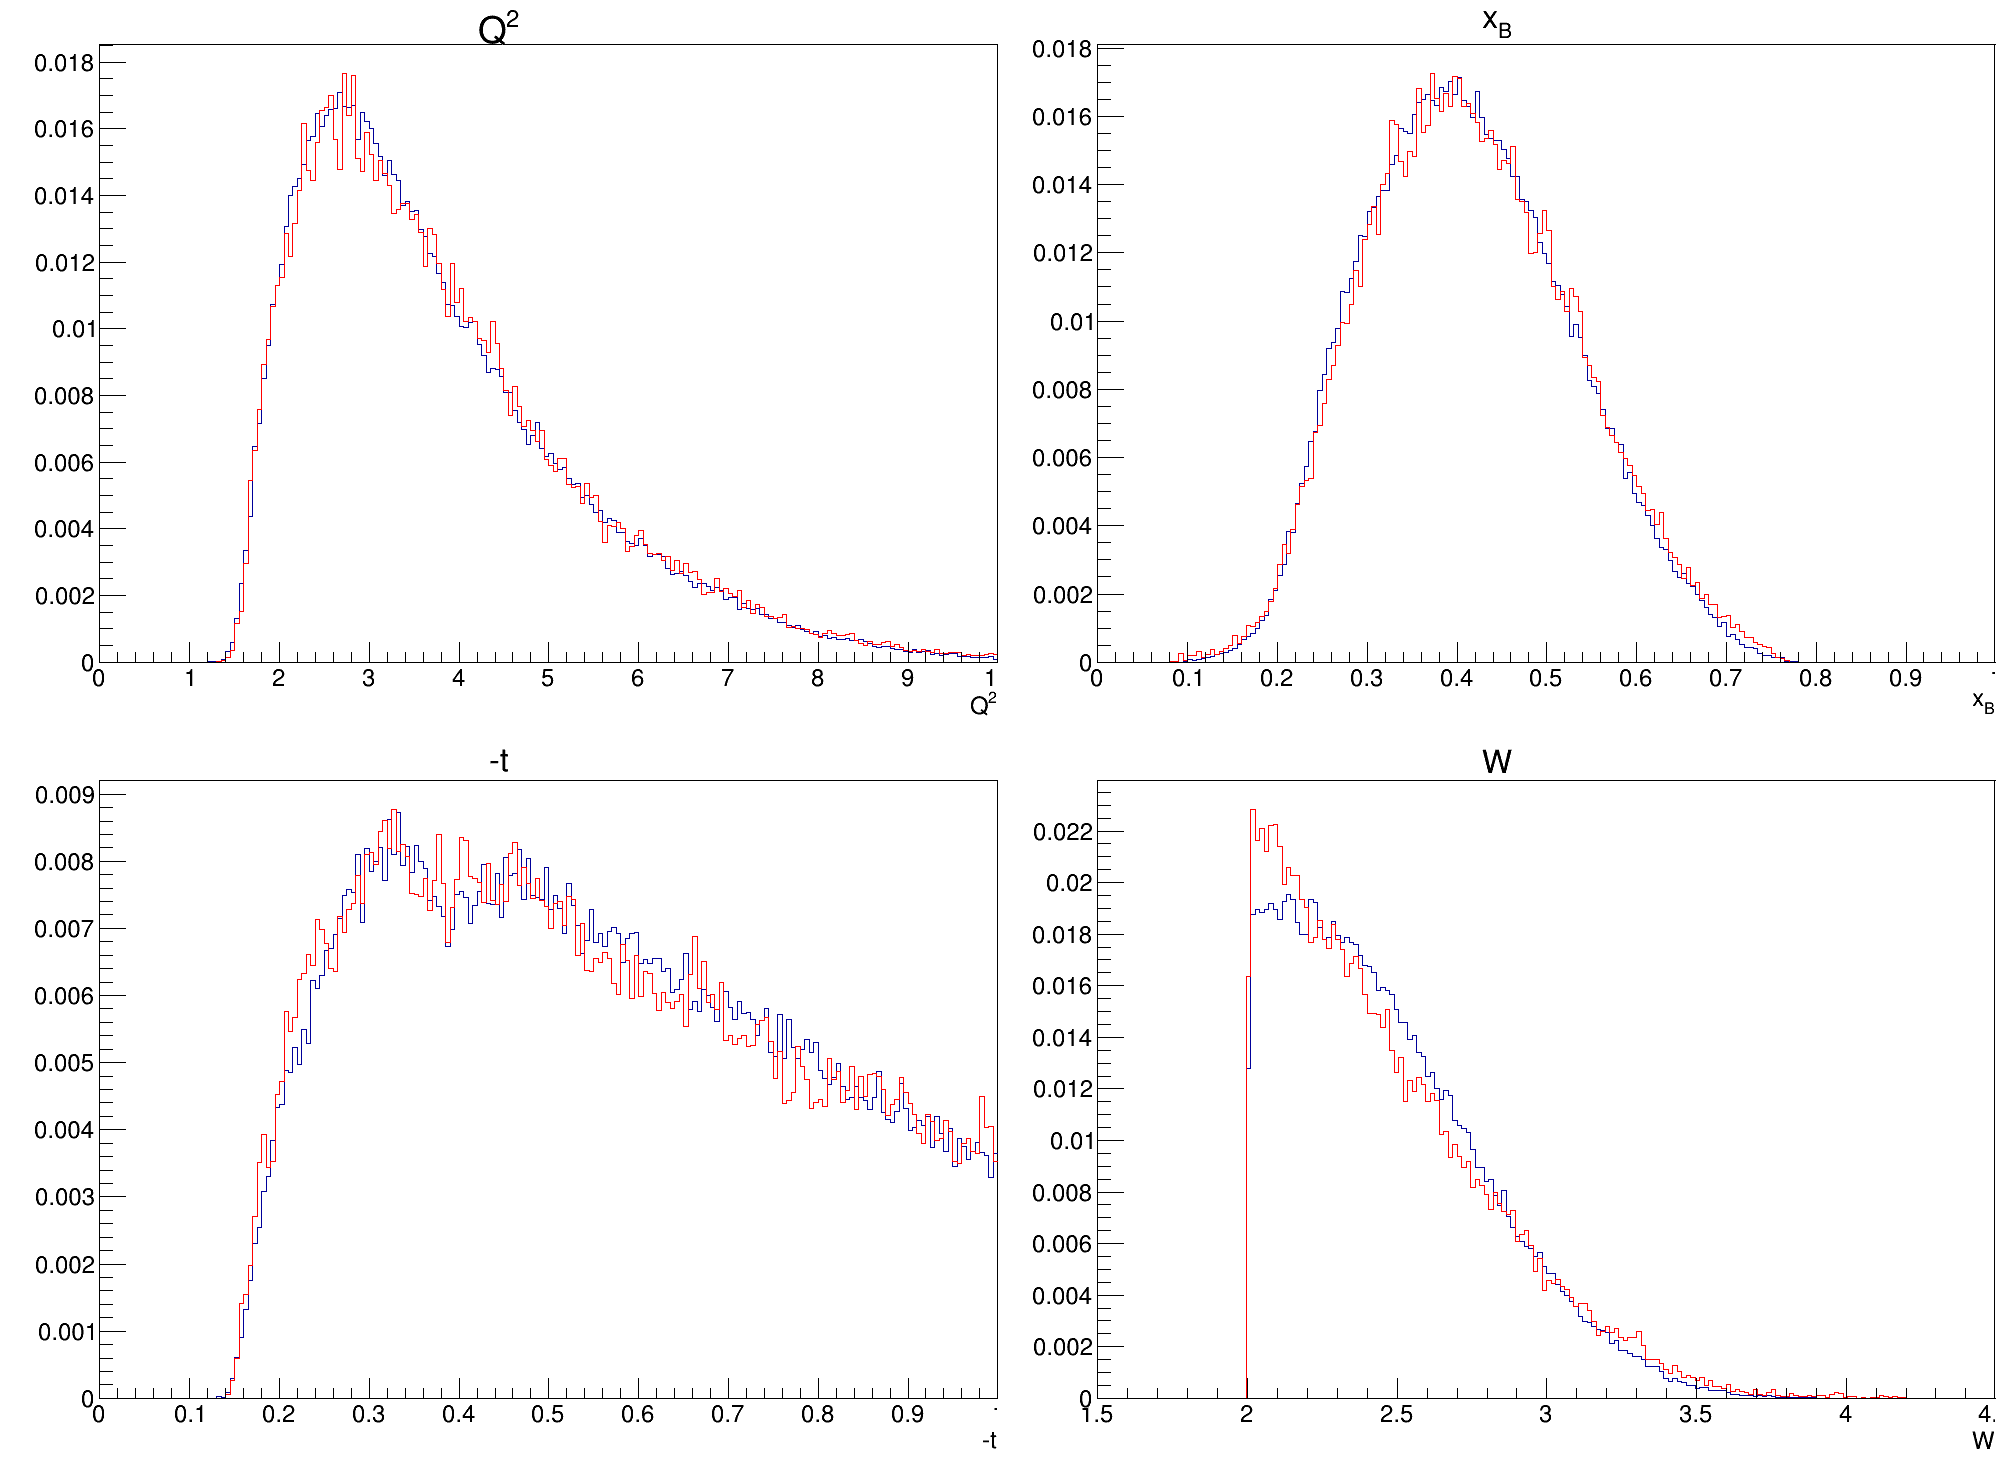

In [40]:
c1 = ROOT.TCanvas("c1","c1",2000,1500)
c1.Draw()

hss=[]
c1.Divide(2,2,0.0001,0.0001)

ipad=0
for h0,h1 in zip(*h3s):
    ipad+=1
    c1.cd(ipad).SetMargin(0.1,0,0.1,0.06)
    h1.SetLineColor(2)
    hs = getStack(h0.GetValue(),h1.GetValue())
    hs.Draw("nostack")
    hss.append(hs)

c1.Print("kin_compare_pg3.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file kin_compare_pg4.pdf has been created


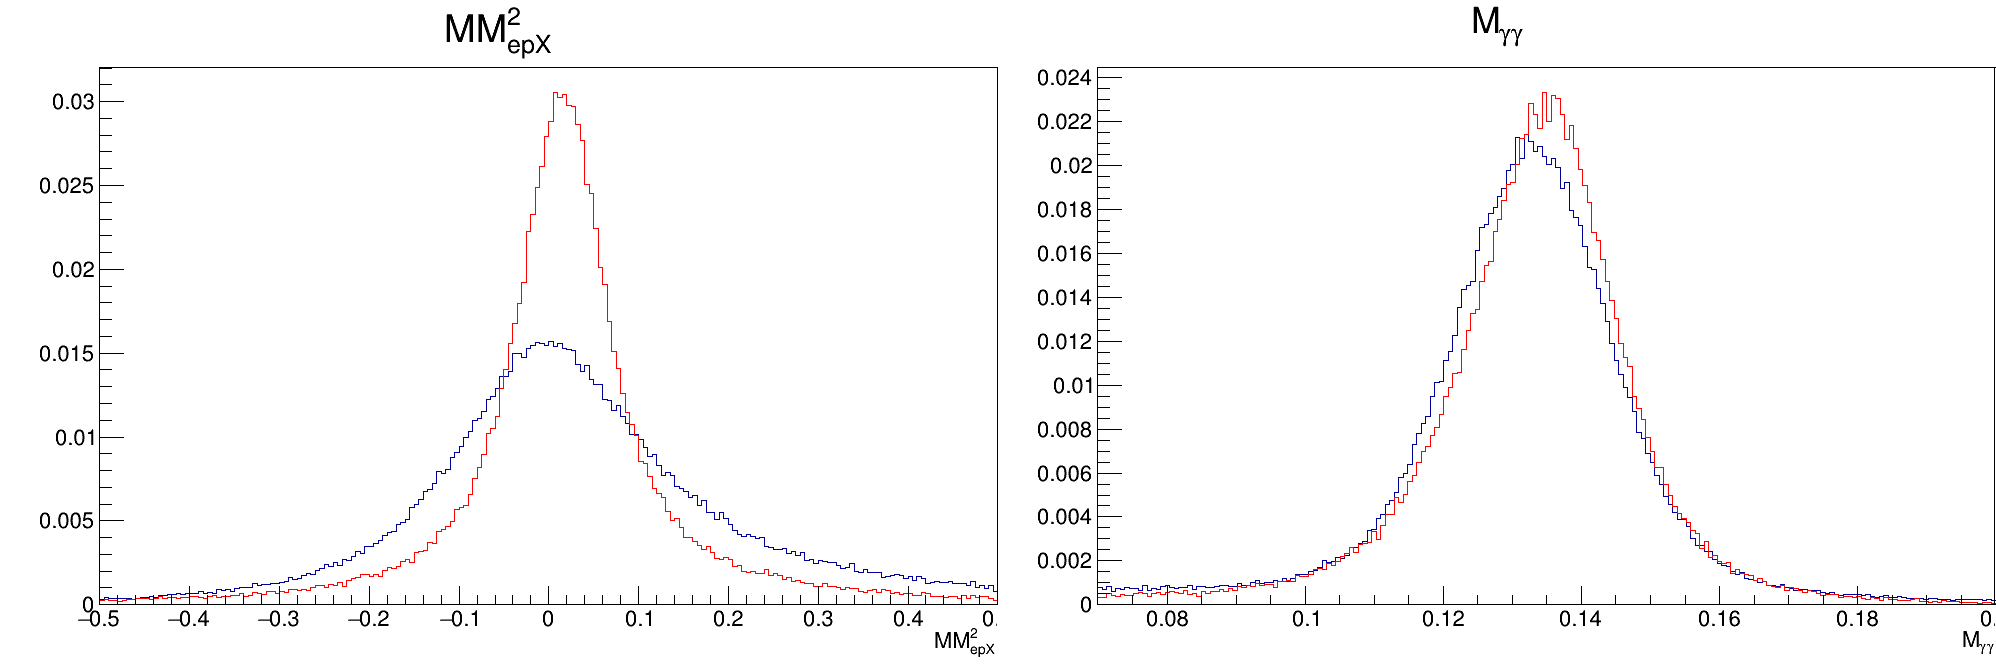

In [41]:
c1 = ROOT.TCanvas("c1","c1",2000,700)
c1.Draw()

hss=[]
c1.Divide(2,1,0.0001,0.0001)

ipad=0
for h0,h1 in zip(*h4s):
    ipad+=1
    c1.cd(ipad).SetMargin(0.1,0,0.1,0.1)
    h1.SetLineColor(2)
    hs = getStack(h0.GetValue(),h1.GetValue())
    hs.Draw("nostack")
    hss.append(hs)

c1.Print("kin_compare_pg4.pdf")